<a href="https://colab.research.google.com/github/dani-jimlar/XAI_AIPI_590/blob/main/XAI_Assignment_3__Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment 3
Interpretable ML

Daniela Jiménez Lara



In [55]:
#!pip install numpy pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


1. Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis
of the dataset to understand the relationships between different features and the target variable (churn). Use appropriate visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met.
2. Linear Regression: Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.
3. Logistic Regression: Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.
4. Generalized Additive Model (GAM): Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.
5. Model Comparison: Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.





##1. Exploratory Data Analysis to check Assumptions: Perform an exploratory analysis
Data from: https://www.kaggle.com/datasets/blastchar/telco-customer-*churn*

In [13]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/XAI_2/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [14]:
df.describe(include=['object', 'category'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [15]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [16]:
df['Churn_l'] = df['Churn'].map({'Yes': 1, 'No': 0})



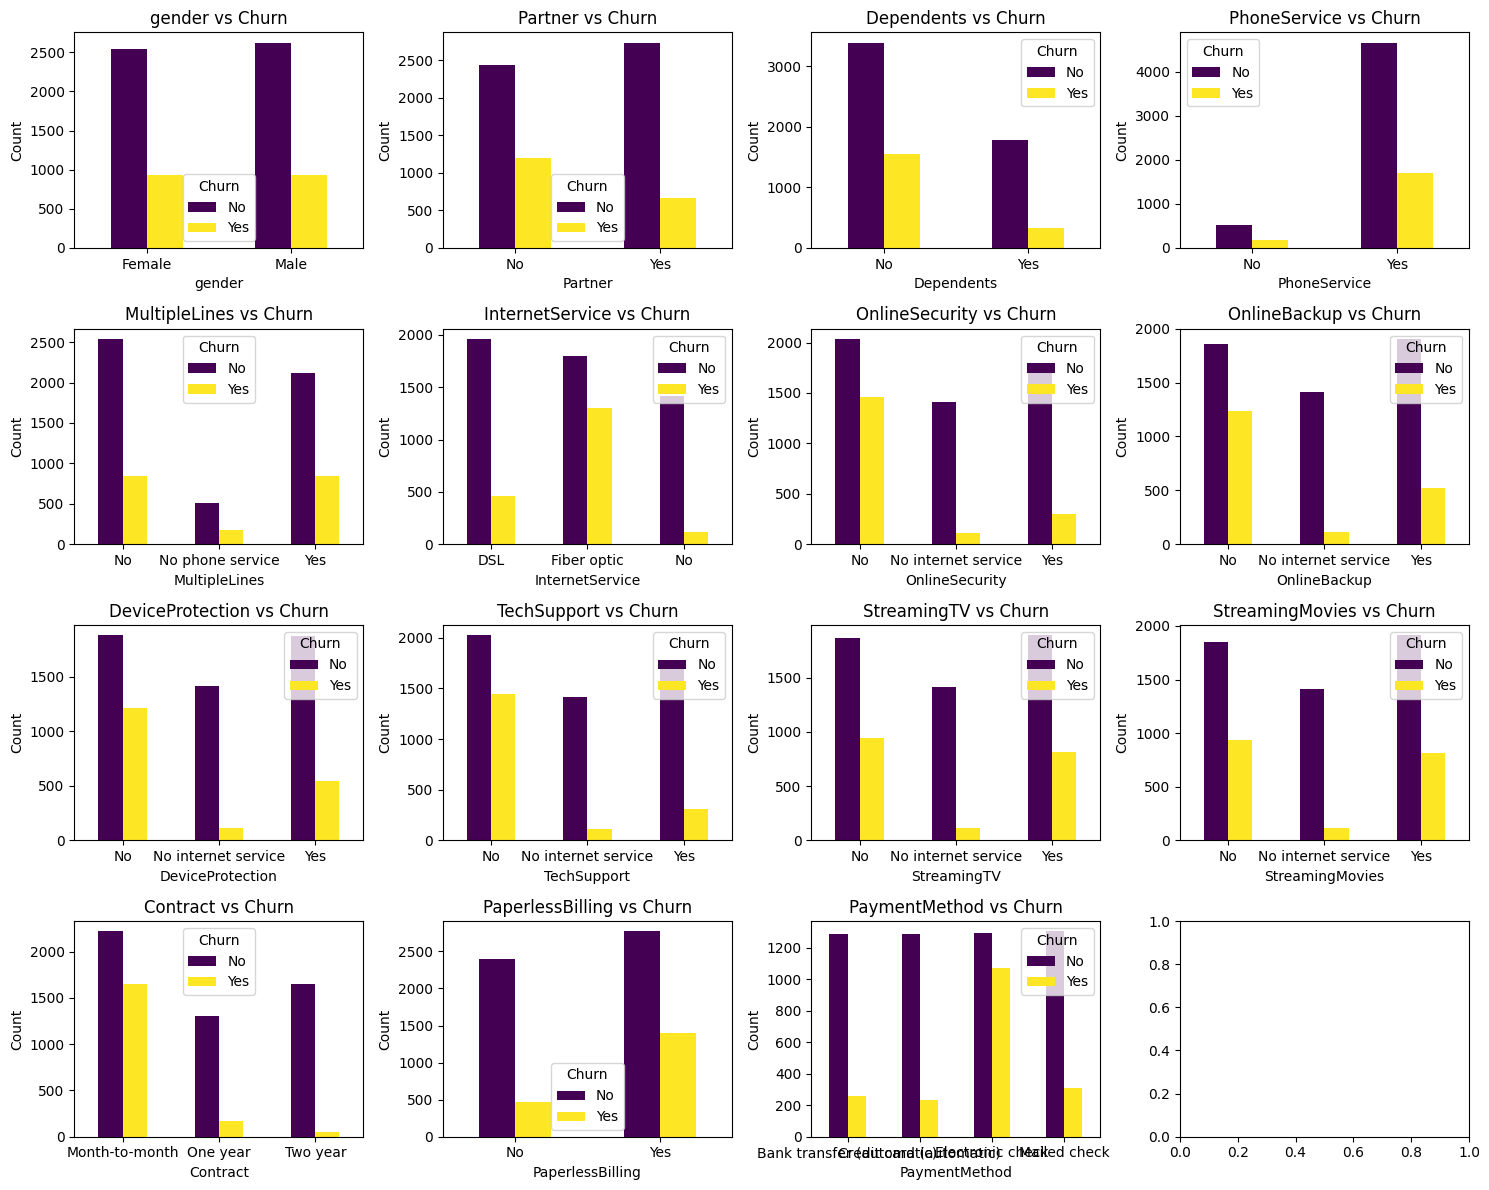

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
dum_vars = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for idx, i in enumerate(dum_vars):
    cross_tab = pd.crosstab(df[i], df['Churn'])
    cross_tab.plot(kind='bar', stacked=False, ax=axes[idx], colormap='viridis')

    axes[idx].set_title(f'{i} vs Churn')
    axes[idx].set_xlabel(i)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

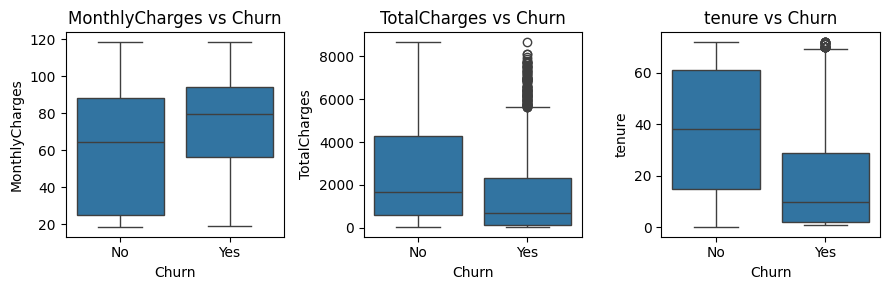

In [18]:
cont_vars = ['MonthlyCharges', 'TotalCharges', 'tenure']

n_rows = 1
n_cols = 3


fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 3))
axes = axes.flatten()

for idx, var in enumerate(cont_vars):
    sns.boxplot(x='Churn', y=var, data=df, ax=axes[idx])
    axes[idx].set_title(f'{var} vs Churn')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(var)

plt.tight_layout()
plt.show()

 ## 1.2 Visualizations and statistical methods to determine whether assumptions about linear, logistic, and GAM models are met

## Feature selection
1. Check correlation of continous variables
2. Perform Chi square test for all variables
3. Regularization using lasso
4. Compare results from 1,2,3 to select final vars


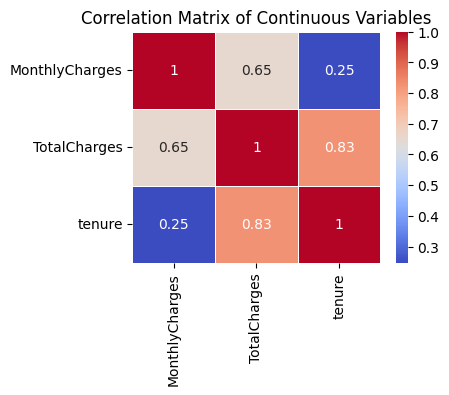

In [19]:
#correlation matrix
corr_matrix = df[['MonthlyCharges', 'TotalCharges','tenure']].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [20]:
from scipy.stats import chi2_contingency

categorical_vars = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

def chi_square_test(var):
    cross_tab = pd.crosstab(df[var], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    print(f"{var}: Chi-square = {chi2:.4f}, p-value = {p:.4f}")

for var in categorical_vars:
    chi_square_test(var)


gender: Chi-square = 0.4841, p-value = 0.4866
Partner: Chi-square = 158.7334, p-value = 0.0000
Dependents: Chi-square = 189.1292, p-value = 0.0000
PhoneService: Chi-square = 0.9150, p-value = 0.3388
MultipleLines: Chi-square = 11.3304, p-value = 0.0035
InternetService: Chi-square = 732.3096, p-value = 0.0000
OnlineSecurity: Chi-square = 849.9990, p-value = 0.0000
OnlineBackup: Chi-square = 601.8128, p-value = 0.0000
DeviceProtection: Chi-square = 558.4194, p-value = 0.0000
TechSupport: Chi-square = 828.1971, p-value = 0.0000
StreamingTV: Chi-square = 374.2039, p-value = 0.0000
StreamingMovies: Chi-square = 375.6615, p-value = 0.0000
Contract: Chi-square = 1184.5966, p-value = 0.0000
PaperlessBilling: Chi-square = 258.2776, p-value = 0.0000
PaymentMethod: Chi-square = 648.1423, p-value = 0.0000


In [22]:
df = df.dropna(subset=['TotalCharges'])


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod',
                       'MonthlyCharges', 'TotalCharges']], drop_first=True)

y = df['Churn_l']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with Lasso (L1) Regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train_scaled, y_train)

lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_[0]})
print(lasso_coefficients[lasso_coefficients['Coefficient'] != 0])


                                  Feature  Coefficient
0                           SeniorCitizen     0.082298
1                                  tenure    -1.433277
3                            TotalCharges     0.674819
4                             gender_Male    -0.009788
5                             Partner_Yes     0.064123
6                          Dependents_Yes    -0.110931
7                        PhoneService_Yes    -0.115819
8          MultipleLines_No phone service     0.044672
9                       MultipleLines_Yes     0.092733
10            InternetService_Fiber optic     0.407347
11                     InternetService_No    -0.000108
12     OnlineSecurity_No internet service    -0.310916
13                     OnlineSecurity_Yes    -0.181229
14       OnlineBackup_No internet service    -0.000002
15                       OnlineBackup_Yes    -0.046221
16   DeviceProtection_No internet service    -0.000088
17                   DeviceProtection_Yes    -0.018022
19        

Comparing the correlation matrix, the chi2 tests and lasso coefficients, the feature selection to continue testing the model are:
*   'SeniorCitizen'
*   'tenure'
*   'TotalCharges'
*   'gendere'
*   'Partner'
*   'Dependents'
*   'PhoneService'
*   'MultipleLines'
*   'InternetService_'
*   'OnlineSecurity'
*   'OnlineBackup'
*   'DeviceProtection'
*   'TechSupport'
*   'Streaming: TV'
*   'Streaming: mMovies'
*   'Contract: One_year'
*   'Contract: Two year'
*   'PaperlessBilling_Yes'
*   'PaymentMethod_Electronic check'




## Linear Regression

### Model

In [30]:
df_clean=df.copy()
df_clean=df_clean.drop(columns=['customerID', 'Churn'])
df_encoded = pd.get_dummies(df_clean, drop_first=True)
df_encoded.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_l',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [87]:

df_clean=df.copy()
df_clean=df_clean.drop(columns=['customerID', 'Churn'])
df_encoded = pd.get_dummies(df_clean, drop_first=True)
y = df_encoded['Churn_l']

X = df_encoded[['SeniorCitizen','tenure'
,'TotalCharges'
,'Dependents_Yes'
,'PhoneService_Yes'
,'InternetService_No'
,'OnlineSecurity_Yes'
,'OnlineBackup_Yes'
,'TechSupport_Yes'
,'StreamingTV_Yes'
,'StreamingMovies_Yes'
,'Contract_One year'
,'Contract_Two year'
,'PaperlessBilling_Yes'
,'PaymentMethod_Electronic check']]

y = df_encoded['Churn_l']
#X = df_encoded[['SeniorCitizen', 'tenure', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes']]

X= X.dropna()
y= y[X.index]
X = X.astype(int)
y= y.astype(int)


X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                Churn_l   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     167.4
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:58:45   Log-Likelihood:                -3157.0
No. Observations:                7032   AIC:                             6346.
Df Residuals:                    7016   BIC:                             6456.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       


**SeniorCitizen**: Being a Senior Citizen increases the
probability of churning by ~ 6.42% compared to not being a Senior Citizen

**Tenure** Each additional month of tenure decreases the probability of churning ~0.35%


> Add blockquote


**TotalCharges**: not statistically significant


**Dependents**
Having dependents decreases the probability of churning by ~2.49% compared to not having dependents


**Phone service**
Having phone servicce increases the probability of churning ~ 4.93% compared to not having phone service.

**InternetService_No**
Not having internet service decreases the probability of churning ~ 20.80% compared to having internet service

**OnlineSecurity_Yes** Having online security decreases the probability of churning ~r 8.52% compared to not having online security.


**OnlineBackup_Yes** Having online backup decreases the probability of churning ~ 3.49% compared to not having online backup.


**Tech support**
Tech support decreases the probability of churning ~ 8.84% compared to not having tech support.

**StreamingTV_Yes**
Having streaming TV increases the probability of churning by ~ 4.98% compared to not having streaming TV.

**StreamingMovies_Yes**
Having streaming movies increases the probability of churning by ~ 5.05% compared to not having streaming movies.

**Contract_One year**
Having a one-year contract decreases the probability of churning ~ 12.73% compared to having no contract.

**Contract_Two year**
 Having a two-year contract decreases the probability of churning by ~ 8.87% compared to having no contract.

**PaperlessBilling_Yes** Having paperless billing increases the probability of churning ~6.07% compared to not choosing paperless billing.

**PaymentMethod_Electronic check** Having electronic check payment method increases the probability of churning ~ 9.64%

### Assumptions

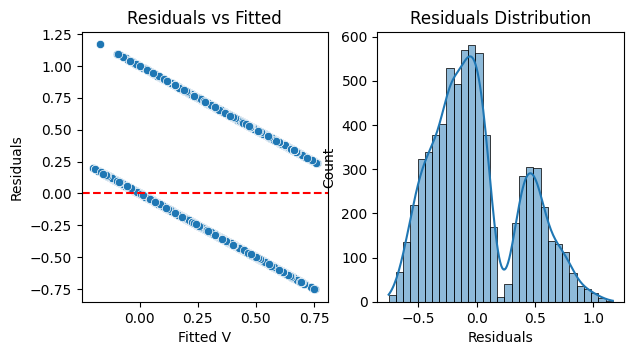

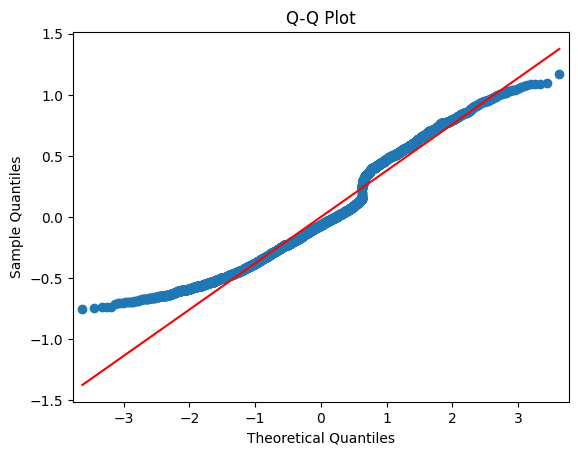

In [41]:
residuals = result.resid
fitted = result.fittedvalues

plt.figure(figsize=(7, 3.5))
# Linearity and Homoscedasticity
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted V')
plt.ylabel('Residuals')

# Normality of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')

plt.show()

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#categorical
continuous_v = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_cat_dummies = pd.get_dummies(df[dum_vars], drop_first=True)

X_vif = df_cat_dummies

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)


# continous
df_cont = pd.get_dummies(df[continuous_v], drop_first=True)

X_vif = df_cont

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  feature       VIF
0                             gender_Male  1.001245
1                             Partner_Yes  1.387740
2                          Dependents_Yes  1.328567
3                        PhoneService_Yes  0.002271
4          MultipleLines_No phone service  0.003094
5                       MultipleLines_Yes  1.345649
6             InternetService_Fiber optic  1.976559
7                      InternetService_No       inf
8      OnlineSecurity_No internet service       inf
9                      OnlineSecurity_Yes  1.390749
10       OnlineBackup_No internet service       inf
11                       OnlineBackup_Yes  1.321738
12   DeviceProtection_No internet service       inf
13                   DeviceProtection_Yes  1.464100
14        TechSupport_No internet service       inf
15                        TechSupport_Yes  1.473075
16        StreamingTV_No internet service       inf
17                        StreamingTV_Yes  1.621244
18    Stream

### Assumption Compliance

**Linearity and Homoscedasticity**

Linearity is violated as shown in the lack of randomness in the residuals vs. fitted values. As this linear regression is predicting a binary target, this violation is expected

**Normality of Residuals**

The residuals do not follow a normal distribution as seen in the distribution graph. The sqwed point shown on the qq-plot also let us see this.

**Multicolinearity**

Variables to drop that have high multicolliniarity according to their VIF score :
 *   'InternetService_No',
 *   'OnlineSecurity_No internet service',
 *   'OnlineBackup_No internet service',
 *   'DeviceProtection_No internet service',
 *   'TechSupport_No internet service',
 *   'StreamingTV_No internet service',
 *   'StreamingMovies_No internet service'
 *   'Monthly_Charges'

### Model Performance

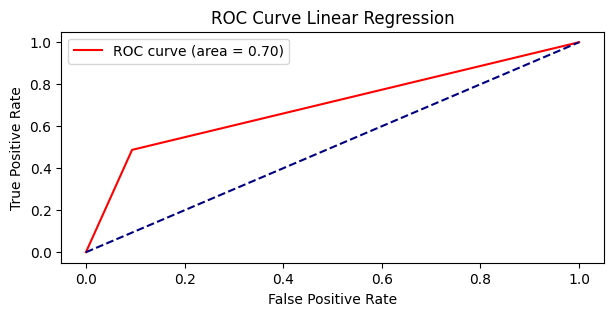

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# use model to predict  target variable
y_hat = result.predict(X)

y_hat_bi = (y_hat > 0.5).astype(int)

# Evaluation metrics
accuracy = accuracy_score(y, y_hat_bi)
precision = precision_score(y, y_hat_bi)
recall = recall_score(y, y_hat_bi)
f1 = f1_score(y, y_hat_bi)

#  ROC curve
roc_auc = roc_auc_score(y, y_hat_bi)
fpr, tpr, _ = roc_curve(y, y_hat_bi)

plt.figure(figsize=(7, 3))
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Linear Regression')
plt.legend()
plt.show()

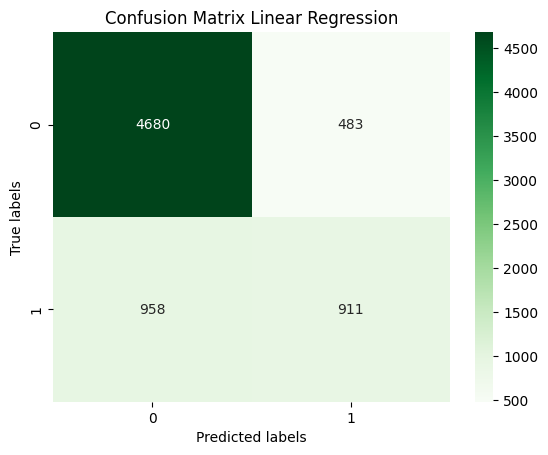

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_hat_bi)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Linear Regression')
plt.show()

In [69]:
def cm_for(y_test, y_pred, process=True):
  ConfuMat = confusion_matrix(y_test, y_pred)
  TN, FP, FN, TP = ConfuMat.ravel()
  FOR = FN / (FN + TN) if (FN + TN) > 0 else 0
  if process:
    print(f"False Omission Rate: {FOR} ")
  return (FOR)

FOR_linear=cm_for(y, y_hat_bi)

False Omission Rate: 0.16991841078396594 


### Conclusions

**Model Performance**
The ROC curve of our model is better than random chance but far from an acceptable. Exploring the accuracy, precision and reacall on the confusion matrix, lets us see how our model fails in the predictions and possible consequences if the company uses it.


*   High True Negative Rate
*   True positives and False positives numbers are too similar.
*   The False Omission Rate, or predicted negatives that are false negatives, is around 16%. This is the proportion of clients predicted to stay but churned.


**Robustness and estatistical significance**
The robustnes of our model is low with only a 26% of the variance explained by it. However, the F1 score indicates it is statitically significant.


**Low coefficients**

Most of the coefficients of the model have a small impact in predicting the probability of churn. The highest one increases the probabilty by 12%, while most increase it by less than 10%. For such small impact in very diverse variables, it would be difficult to allocate strategies to avoid churn.


**Is this model the best choice?**
As the outcome variable is dichotonomus, using a linear regression is not the best choice. The violation of most assumption further proves this point.



## Logistic Regression

### Model

In [48]:
import statsmodels.api as sm

df_clean=df.copy()
df_clean=df_clean.drop(columns=['customerID', 'Churn'])
df_encoded = pd.get_dummies(df_clean, drop_first=True)
y = df_encoded['Churn_l']

X = df_encoded[['SeniorCitizen','tenure'
,'TotalCharges'
,'Dependents_Yes'
,'PhoneService_Yes'
,'InternetService_No'
,'OnlineSecurity_Yes'
,'OnlineBackup_Yes'
,'TechSupport_Yes'
,'StreamingTV_Yes'
,'StreamingMovies_Yes'
,'Contract_One year'
,'Contract_Two year'
,'PaperlessBilling_Yes'
,'PaymentMethod_Electronic check']]

y = df_encoded['Churn_l']
#X = df_encoded[['SeniorCitizen', 'tenure', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes']]

X= X.dropna()
y= y[X.index]
X = X.astype(int)
y= y.astype(int)

X= sm.add_constant(X)


model_l = sm.Logit(y, X).fit()

print(model_l.summary())

Optimization terminated successfully.
         Current function value: 0.419747
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Churn_l   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7016
Method:                           MLE   Df Model:                           15
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.2751
Time:                        13:10:18   Log-Likelihood:                -2951.7
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1425      0.145      0.981     

**SeniorCitizen:** The odds of a senior citizen churning are 33% higher than for a non-senior citizen (since
𝑒
0.2888
≈
1.33
).

**Tenure:** For each additional month of tenure, the odds of a customer churning are 7% lower (since
𝑒
−
0.0744
≈
0.93
)


**TotalCharges:** For each additional unit in total charges, the odds of a customer churning are 0.06% higher (since
𝑒
0.0006
≈
1.0006
).

**Dependents_Yes:** The odds of a customer with dependents churning are 15% lower than for a customer without dependents (since
𝑒
−
0.1662
≈
0.85
).

**PhoneService_Yes** The odds of a customer with phone service churning are 19% lower than for a customer without phone service (since
𝑒
−
0.2114
≈
0.81
), though this is not statistically significant (p-value = 0.088).

**InternetService_No**

The odds of a customer without internet service churning are 69% lower than for a customer with internet service (since
𝑒
−
1.1582
≈
0.31
).

**OnlineSecurity_Ye**

The odds of a customer with online security churning are 40% lower than for a customer without online security (since
𝑒
−
0.5064
≈
0.60
).

**OnlineBackup_Yes**

The odds of a customer with online backup churning are 19% lower than for a customer without online backup (since
𝑒
−
0.2134
≈
0.81
).

**TechSupport_Yes**

The odds of a customer with tech support churning are 40% lower than for a customer without tech support (since
𝑒
−
0.5079
≈
0.60
).

**StreamingTV_Yes**

The odds of a customer with streaming TV churning are 21% higher than for a customer without streaming TV (since
𝑒
0.1948
≈
1.21
).

**StreamingMovies_Yes**

The odds of a customer with streaming movies churning are 22% higher than for a customer without streaming movies (since
𝑒
0.1993
≈
1.22
).

**Contract_One year**
The odds of a customer with a one-year contract churning are 53% lower than for a customer with a month-to-month contract (since
𝑒
−
0.7650
≈
0.47
).

**Contract_Two year**
The odds of a customer with a two-year contract churning are 78% lower than for a customer with a month-to-month contract (since
𝑒
−
1.5016
≈
0.22
).

**PaperlessBilling_Yes**
The odds of a customer with paperless billing churning are 52% higher than for a customer without paperless billing (since
𝑒
0.4176
≈
1.52
).

**PaymentMethod_Electronic check**
The odds of a customer paying by electronic check churning are 54% higher than for a customer using other payment methods (since
𝑒
0.4300
≈
1.54).

### Assumptions


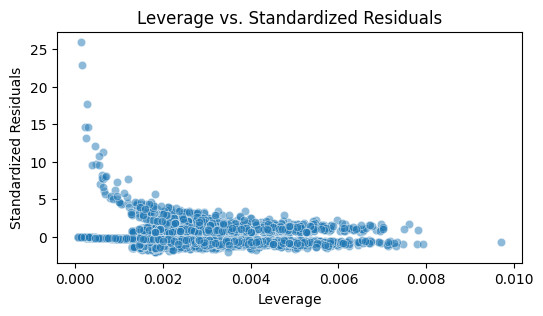

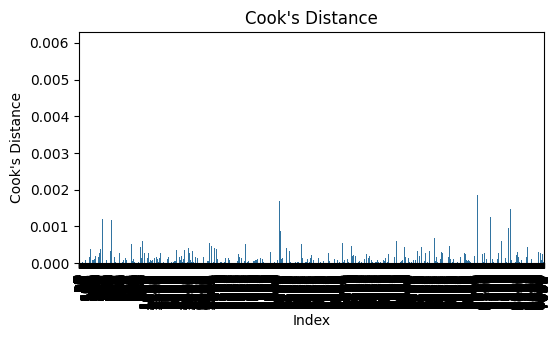

In [49]:
influence = model_l.get_influence()

influence_summary = influence.summary_frame()


# Leverage vs. standardized residuals
plt.figure(figsize=(6, 3))
sns.scatterplot(x=influence_summary['hat_diag'], y=influence_summary['standard_resid'], alpha=0.5)
plt.title('Leverage vs. Standardized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Cook's Distance
plt.figure(figsize=(6, 3))
sns.barplot(x=influence_summary.index, y=influence_summary['cooks_d'])
plt.title('Cook\'s Distance')
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.xticks(rotation=90)
plt.show()

### Assumption Compliance

**Multicolinearity**

Variables to drop that have high multicolliniarity according to their VIF score :
 *   'InternetService_No',
 *   'OnlineSecurity_No internet service',
 *   'OnlineBackup_No internet service',
 *   'DeviceProtection_No internet service',
 *   'TechSupport_No internet service',
 *   'StreamingTV_No internet service',
 *   'StreamingMovies_No internet service'
 *   'Monthly_Charges'



 **No influential outliers**

Cooks distance plot with small value and Leverage vs Standarized Residuals plot with low leverage and high residuals, show there are no influential outliers.

### Model Performance


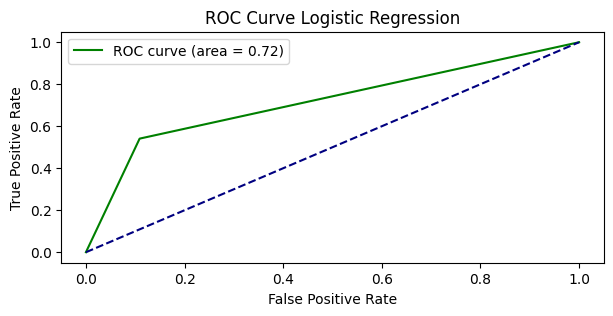

In [50]:
y_hat_log = model_l.predict(X)
y_hat_log_bi = (y_hat_log > 0.5).astype(int)

# Evaluation metrics
log_accuracy = accuracy_score(y, y_hat_log_bi)
log_precision = precision_score(y,y_hat_log_bi)
log_recall = recall_score(y,y_hat_log_bi)
log_f1 = f1_score(y, y_hat_log_bi)

#  ROC curve
log_roc_auc = roc_auc_score(y, y_hat_log_bi)
log_fpr, log_tpr, _ = roc_curve(y, y_hat_log_bi)

plt.figure(figsize=(7, 3))
plt.plot(log_fpr, log_tpr, color='green', label='ROC curve (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend()
plt.show()

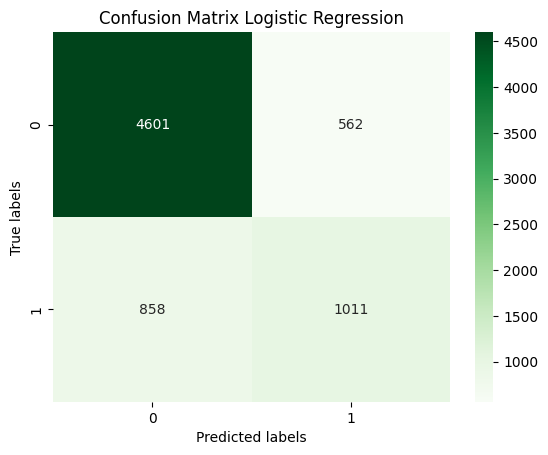

In [51]:
cm_log = confusion_matrix(y, y_hat_log_bi)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

In [70]:
# False omission rate
FOR_logistic = cm_for(y, y_hat_log_bi)

False Omission Rate: 0.15717164315808757 


### Conclusions
**Model Performance** The ROC curve of the logistic model is better than random chance but far from an acceptable with an area under the curve of 72%. By exploring the accuracy, precision and recall on the confusion matrix, we can see where the model fails.

*  High True Negative Rate
*  True positives and False positives numbers are too similar.
*  The False Omission Rate, or predicted negatives that are false negatives, is around 15%. This is the proportion of clients predicted to stay but churned.


**Robustness and estatistical significance**
he robustnes of our model is low with only a 27% of the variance explained by it.

**Coefficients**

Most of the coefficients of the model have moderate impact in predicting the odds of churn. The highest one increases the odds by 78%, while smallest increase it by less than 7%.

**Is this model the best choice?** As our problem is a classification issue with a binary outcome,  using the logisitic regression is the best choice. The logs odds ratio to calculate the probability of churn is the linear transformation needed to deal with this target variable

# Generalized Additive Model (GAM)

In [73]:
df_clean=df.copy()
df_clean=df_clean.drop(columns=['customerID', 'Churn'])
df_encoded = pd.get_dummies(df_clean, drop_first=True)
y = df_encoded['Churn_l']

X = df_encoded[['SeniorCitizen','tenure'
,'TotalCharges'
,'Dependents_Yes'
,'PhoneService_Yes'
,'InternetService_No'
,'OnlineSecurity_Yes'
,'OnlineBackup_Yes'
,'TechSupport_Yes'
,'StreamingTV_Yes'
,'StreamingMovies_Yes'
,'Contract_One year'
,'Contract_Two year'
,'PaperlessBilling_Yes'
,'PaymentMethod_Electronic check']]

y = df_encoded['Churn_l']
X.columns

Index(['SeniorCitizen', 'tenure', 'TotalCharges', 'Dependents_Yes',
       'PhoneService_Yes', 'InternetService_No', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'],
      dtype='object')

In [78]:

from pygam import LogisticGAM, s, f
# Creating the full model:
gam = LogisticGAM(
    s(0)+  #senior
    s(1) +  #tenure
    s(2) +  #total charges
    f(4) +  #Dependantyes
    f(4) +  #Phone service
    f(5) +  #internet service no
    f(6) +  #online security
    f(7) +  #online backup
    f(8) + #tech support
    f(9) + #stream tv
    f(10) + #stream movies
    f(11) +  #contract one y
    f(12) + #contract two y
    f(13) + #paperles billing
    f(14) #payemnt check
    ).fit(X, y)

gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     37.5152
Link Function:                        LogitLink Log Likelihood:                                 -2878.5835
Number of Samples:                         7032 AIC:                                             5832.1974
                                                AICc:                                            5832.6327
                                                UBRE:                                               2.8336
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.293
Feature Function                  Lam

<ipython-input-78-44b0d3213fb1>:20: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


The P values from the features tell us which ones are significant and which ones are not.

**Significant**:


*  SeniorCitizen Effective: statistically significant and

*  Tenure: statistically significant. EDoF shows non linear relationship

*  Total charges: significant. EDoF shows non linear relationship

*  PhoneService_Yes: customers with phone service are less likely to churn
*  InternetService_No: Having internet service strongly affects likelihood of churning.
*. OnlineSecurity_Yes: Customers with online security are less likely to churn.
* OnlineBackup_Yes: Customers with online backup are less likely to churn.
*. TechSupport_Yes: Having tech support reduces the likelihood of churn.

**Not Sognificant:**  
*.
*.  

*   StreamingTV_Yes: streaming services do not have a strong impact on churn.
*   StreamingMovies_Yes:streaming services do not have a
strong impact on churn.




### Model Performance



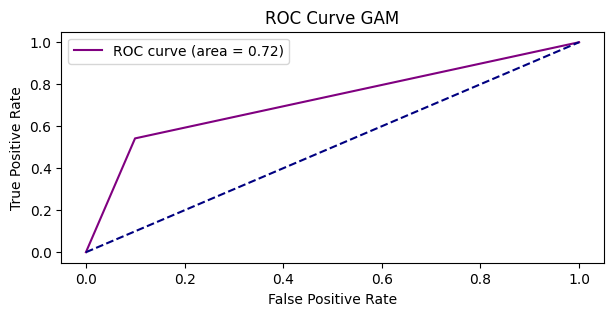

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# use model to predict  target variable
y_hat_gam = gam.predict(X)

y_hat_gam = (y_hat_gam > 0.5).astype(int)

# Evaluation metrics
gam_accuracy = accuracy_score(y, y_hat_gam)
gam_precision = precision_score(y, y_hat_gam)
recall = recall_score(y, y_hat_gam)
f1 = f1_score(y, y_hat_gam)

#  ROC curve
gam_roc_auc = roc_auc_score(y, y_hat_gam)
gam_fpr, gam_tpr, _ = roc_curve(y, y_hat_gam)

plt.figure(figsize=(7, 3))
plt.plot(gam_fpr, gam_tpr, color='purple', label='ROC curve (area = %0.2f)' % gam_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve GAM')
plt.legend()
plt.show()

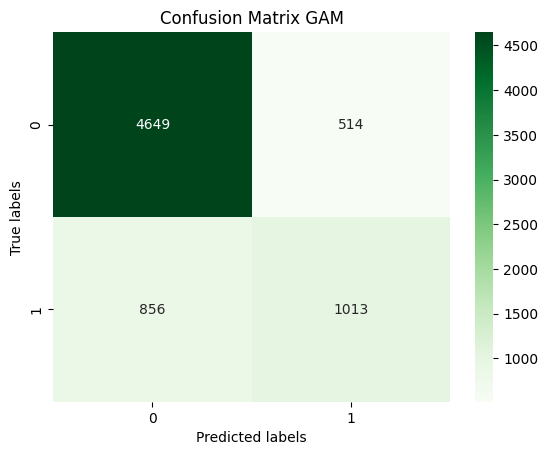

In [90]:
cm_log = confusion_matrix(y, y_hat_gam)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix GAM')
plt.show()

In [82]:
FOR_gam=cm_for(y, y_hat_gam)

False Omission Rate: 0.15549500454132606 


### Conclusions

**Model Performance**
The ROC curve of our model is better than random chance but far from an acceptable. Exploring the accuracy, precision and reacall on the confusion matrix, lets us see how our model fails in the predictions and possible consequences if the company uses it.

*   High True Negative Rate
*   The False Omission Rate, or predicted negatives that are false negatives, is around 15%. This is the proportion of clients predicted to stay but churned.
*   

**Robustness and estatistical significance**

 The robustnes of our model is low with only a 29% of the variance explained by it. However, the F1 score indicates it is statitically significant.

**Coefficients**

GAM is great at indicating which features have an impact on our result and if the continuous variables have a linar or non-lineat relationship even if they are significant. We are able to identify with this model how the streaming services do not impact the model as much. Given the amount of features, this is an important insight to direct interventions aimed at diminishing churn.


## Model Comparison

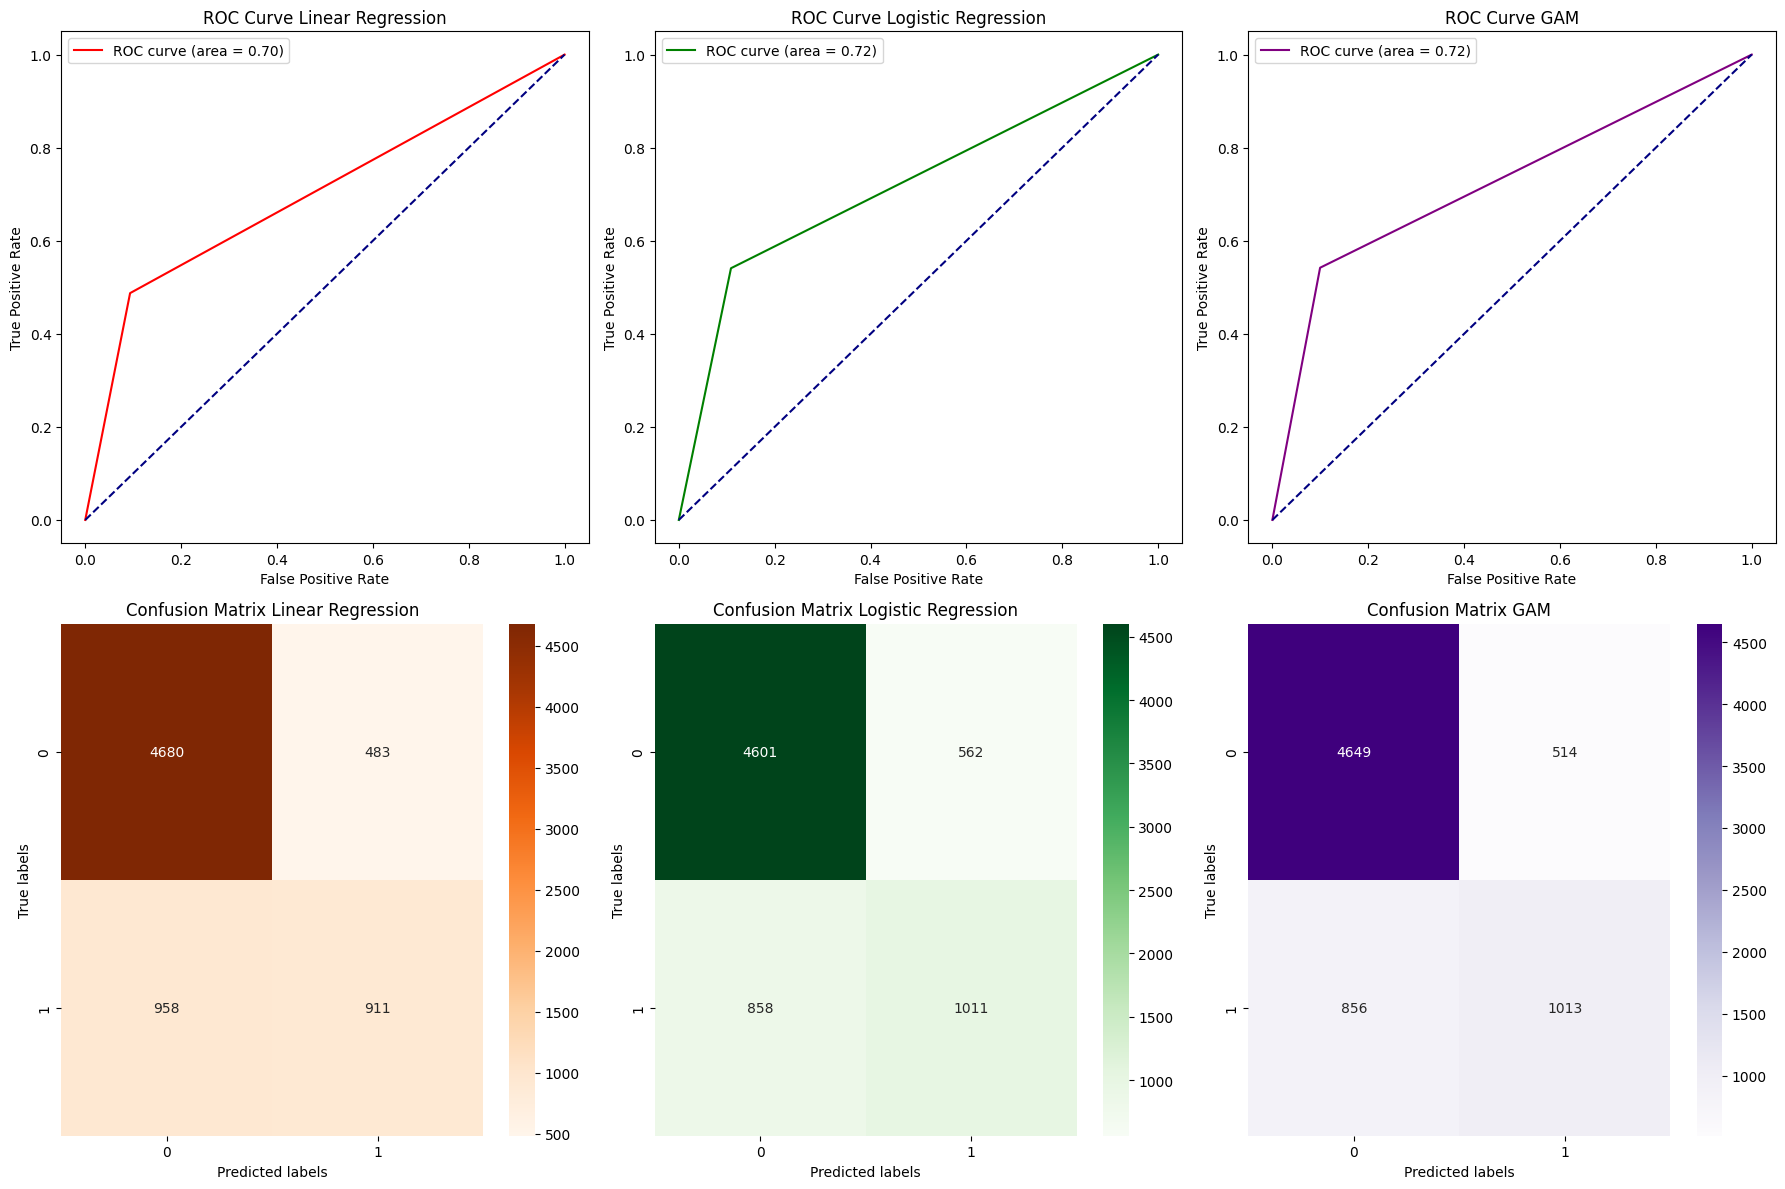

In [96]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
#1
axes[0,0].plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
axes[0,0].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('ROC Curve Linear Regression')
axes[0,0].legend()
#2
axes[0,1].plot(log_fpr, log_tpr, color='green', label='ROC curve (area = %0.2f)' % log_roc_auc)
axes[0,1].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('ROC Curve Logistic Regression')
axes[0,1].legend()
#3
axes[0,2].plot(gam_fpr, gam_tpr, color='purple', label='ROC curve (area = %0.2f)' % gam_roc_auc)
axes[0,2].plot([0, 1], [0, 1], color='navy', linestyle='--')
axes[0,2].set_xlabel('False Positive Rate')
axes[0,2].set_ylabel('True Positive Rate')
axes[0,2].set_title('ROC Curve GAM')
axes[0,2].legend()


#4
cm_lin = confusion_matrix(y, y_hat_bi)
sns.heatmap(cm_lin, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 0])
axes[1, 0].set_xlabel('Predicted labels')
axes[1, 0].set_ylabel('True labels')
axes[1, 0].set_title('Confusion Matrix Linear Regression')
#5
cm_log = confusion_matrix(y, y_hat_log_bi)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1])
axes[1, 1].set_xlabel('Predicted labels')
axes[1, 1].set_ylabel('True labels')
axes[1, 1].set_title('Confusion Matrix Logistic Regression')

#6
cm_gam = confusion_matrix(y, y_hat_gam)
sns.heatmap(cm_gam, annot=True, fmt='d', cmap='Purples', ax=axes[1, 2])
axes[1, 2].set_xlabel('Predicted labels')
axes[1, 2].set_ylabel('True labels')
axes[1, 2].set_title('Confusion Matrix GAM')

plt.tight_layout()
plt.show()


### Conclusion

Using a linear, logistic and GAM models to predcit churn permits us to understand their weaknesses and stengths. Since our target variable, churn, is a binary output, we seek a model that classifies. In this sense, the linear regression is not the adequate model; however the logistic regression that utilizes a transformation function to deal with the target data provides a better alternative.
The logistic regression deals with the target variable adquatly and by comparing it with the linar model, we can see a better performance per de ROC curve and robustness (though slightly).

Given the amount of features that could explain churn, utilizing GAM logistic model is even a better choice than a logisitc regression. The GAM model allows us to understand and directly avoid features that are not important (like streaming) or that might not have linar effects easily comprehensible. The GAM model also works best in the False Omission rate, has a stronger robustness and ROC.

I would reccomend utilizing a Generalized Additive Model.
